In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

from lingd import LiNGD

In [86]:
def getProduct(matrix):
    # 获取矩阵的维度
    n = matrix.shape[0]

    # 初始化乘积为1（累积乘积）
    product = 1

    # 遍历矩阵中的所有对称位置
    for i in range(n):
        for j in range(i, n):  # 对称元素只需要考虑上三角矩阵的部分
            product *= np.abs(matrix[i, j] * matrix[j, i])
    
    return product

In [120]:
# 参数设置
n = 50000  # 样本数量
p = 2      # 变量数量

# 随机生成系数矩阵 A
A = np.random.uniform(-0.5, 0.5, (p, p))
# A = np.array([[0.3,-0.2],[0.5,0.14]])
A0 = np.diag(np.diag(A))
A1 = A-A0

# 初始化时间序列数据矩阵 y
y = np.zeros((n, p))
y[0,:] = np.random.uniform(-1, 1, p)
for t in range(1, n):
    y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

# 构造 DataFrame
df = pd.DataFrame({
    't': np.arange(1, n + 1),
    'x1': y[:, 0],
    'x2': y[:, 1]
})

# 分组聚合
tw = 200  # 每组行数
# df['group'] = np.ceil(df['t'] / tw).astype(int)  # 创建分组列
# aggregate_df = df.groupby('group').sum().reset_index()  # 按组求和
aggregate_df = df.rolling(window=tw, min_periods=1).sum()

# 提取结果矩阵 x
X = aggregate_df.iloc[:, 1:].to_numpy()  # 转换为矩阵形式并去掉t

In [121]:
model = LiNGD()
model.fit(X)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


In [122]:
Bhat = model.adjacency_matrices_
Bhat = Bhat.squeeze(0)
Bhat

array([[ 0.        ,  0.39682568],
       [-0.5734579 ,  0.        ]])

In [123]:
I = np.eye(p)
np.linalg.inv(I-A0)@A1

array([[0.        , 0.20143537],
       [0.4246412 , 0.        ]])

In [124]:
m1 = df['x1'].shift(1) - Bhat[0,1] * df['x2'] # previous one
m1 = np.array(m1[1:])
n1 = df['x1'] - Bhat[0,1] * df['x2']
n1 = np.array(n1[1:]).reshape(-1, 1)

m2 = df['x1'].shift(-1) - Bhat[0,1] * df['x2'] # next one
m2 = np.array(m2[:-1])
n2 = df['x1'] - Bhat[0,1] * df['x2']
n2 = np.array(n2[:-1]).reshape(-1, 1)

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [126]:
model1 = LinearRegression()
model1.fit(n1, m1)
m1_pred = model1.predict(n1)
err1 = m1 - m1_pred

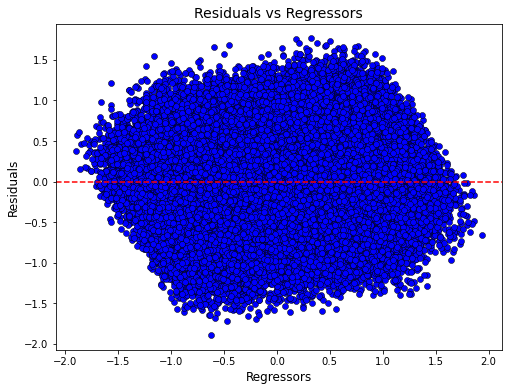

In [ ]:
# 绘制残差与解释变量之间的散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x=n1.squeeze(-1), y=err1, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')  # 添加零线
plt.title('Residuals vs Regressors', fontsize=14)
plt.xlabel('Regressors', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

In [128]:
model2 = LinearRegression()
model2.fit(n2, m2)
m2_pred = model2.predict(n2)
err2 = m2 - m2_pred

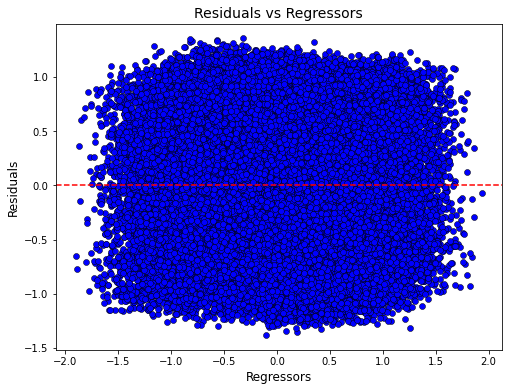

In [ ]:
# 绘制残差与解释变量之间的散点图
plt.figure(figsize=(8, 6))
sns.scatterplot(x=n2.squeeze(-1), y=err2, color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')  # 添加零线
plt.title('Residuals vs Regressors ()', fontsize=14)
plt.xlabel('Regressors', fontsize=12)
plt.ylabel('Residuals', fontsize=12)
plt.show()

In [138]:
# 参数设置
n = 50000  # 样本数量
p = 3      # 变量数量

# 随机生成系数矩阵 A
A = np.random.uniform(-0.5, 0.5, (p, p))
# A = np.array([[0.3,-0.2],[0.5,0.14]])
A0 = np.diag(np.diag(A))
A1 = A-A0

# 初始化时间序列数据矩阵 y
y = np.zeros((n, p))
y[0,:] = np.random.uniform(-1, 1, p)
for t in range(1, n):
    y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

# 构造 DataFrame
df = pd.DataFrame(y, columns=[f'X{i+1}' for i in range(p)])
df.insert(0, 't', range(1, n+1))

# 分组聚合
tw = 1000  # 每组行数

# df['group'] = np.ceil(df['t'] / tw).astype(int)  # 创建分组列
# aggregate_df = df.groupby('group').sum().reset_index()  # 按组求和
aggregate_df = df.rolling(window=tw, min_periods=1).sum()

# 提取结果矩阵 x
X = aggregate_df.iloc[:, 1:].to_numpy()  # 转换为矩阵形式并去掉t

In [139]:
model = LiNGD()
model.fit(X)
Bhat = model.adjacency_matrices_
if sum(model.is_stables_) == 1:
    Bhat = Bhat[model.is_stables_==True].squeeze()
    print(Bhat)
else:    
    print("No solution")

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(


[[ 0.          0.19864667  0.83029349]
 [ 0.40475478  0.          1.03749114]
 [ 0.66001394 -0.5203934   0.        ]]


In [140]:
I = np.eye(p)
np.linalg.inv(I-A0)@A1

array([[ 0.        ,  0.46123183,  0.51767274],
       [ 0.4981632 ,  0.        ,  0.31909696],
       [ 0.32385247, -0.04057636,  0.        ]])

In [ ]:
# Bhat = np.linalg.inv(I-A0)@A1

In [141]:
data = df.iloc[:,1:].to_numpy()
prev_rows = np.vstack([np.zeros(data.shape[1]), data[:-1]])
Y1 = prev_rows - data @ Bhat
X1 = data - data @ Bhat
X1 = X1[1:,:]
Y1 = Y1[1:,:]

In [142]:
beta1 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
beta1.shape

(3, 3)

In [143]:
Y1_fit = X1 @ beta1.T  # 拟合值
residuals1 = Y1 - Y1_fit  # 残差

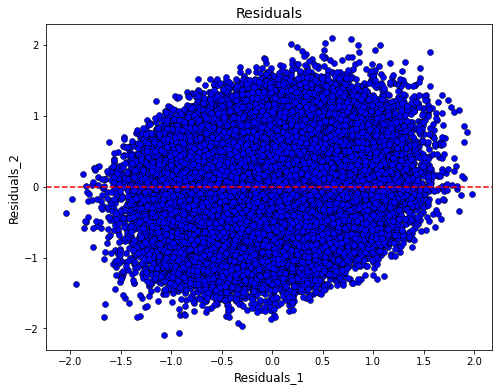

In [144]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residuals1[:,0], y=residuals1[:,1], color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')  # 添加零线
plt.title('Residuals', fontsize=14)
plt.xlabel('Residuals_1', fontsize=12)
plt.ylabel('Residuals_2', fontsize=12)
plt.show()

In [2]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from itertools import combinations

def knn_mutual_information_matrix(data):
    """
    使用 k 近邻法计算矩阵中每两列之间的互信息，并返回平均互信息。

    参数:
        data (numpy.ndarray): 输入矩阵，每列为一个变量。

    返回:
        float: 所有列之间互信息的平均值。
    """
    n_columns = data.shape[1]
    mutual_infos = []

    # 遍历每对列组合
    for i, j in combinations(range(n_columns), 2):
        x = data[:, i].reshape(-1, 1)
        y = data[:, j]

        # 计算互信息
        mi = mutual_info_regression(x, y, discrete_features=False)[0]
        mutual_infos.append(mi)

    # 计算平均互信息
    avg_mi = np.mean(mutual_infos)
    return avg_mi

In [146]:
mi1 = knn_mutual_information_matrix(residuals1)
mi1

0.008007708632274735

In [147]:
data = df.iloc[:,1:].to_numpy()
next_rows = np.vstack([data[1:], np.zeros(data.shape[1])])
Y2 = next_rows - data @ Bhat
X2 = data - data @ Bhat
X2 = X2[:-1,:]
Y2 = Y2[:-1,:]

beta2 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
beta2.shape
Y2_fit = X2 @ beta2.T  # 拟合值
residuals2 = Y2 - Y2_fit  # 残差


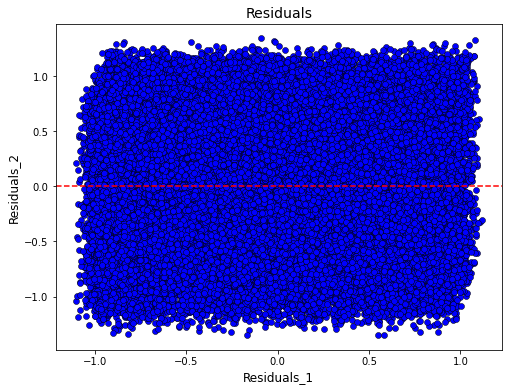

In [148]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residuals2[:,0], y=residuals2[:,1], color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')  # 添加零线
plt.title('Residuals', fontsize=14)
plt.xlabel('Residuals_1', fontsize=12)
plt.ylabel('Residuals_2', fontsize=12)
plt.show()

In [149]:
mi2 = knn_mutual_information_matrix(residuals2)
mi2

0.0004026770058554637

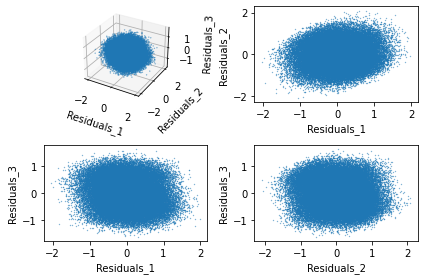

In [150]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')

ax1.scatter(residuals1[:,0], residuals1[:,1], residuals1[:,2], s=0.1, alpha=0.8)  # 默认颜色，点大小为50
ax1.set_xlabel('Residuals_1')
ax1.set_ylabel('Residuals_2')
ax1.set_zlabel('Residuals_3')

# x-y 平面散点图
ax2 = fig.add_subplot(222)
ax2.scatter(residuals1[:,0], residuals1[:,1], s=0.1, alpha=0.8)
# ax2.set_title("X-Y Scatter")
ax2.set_xlabel("Residuals_1")
ax2.set_ylabel("Residuals_2")

# x-z 平面散点图
ax3 = fig.add_subplot(223)
ax3.scatter(residuals1[:,0], residuals1[:,2], s=0.1, alpha=0.8)
# ax3.set_title("X-Z Scatter")
ax3.set_xlabel("Residuals_1")
ax3.set_ylabel("Residuals_3")

# y-z 平面散点图
ax4 = fig.add_subplot(224)
ax4.scatter(residuals1[:,1], residuals1[:,2], s=0.1, alpha=0.8)
# ax4.set_title("Y-Z Scatter")
ax4.set_xlabel("Residuals_2")
ax4.set_ylabel("Residuals_3")

# 调整布局
plt.tight_layout()
plt.show()

# plt.show()

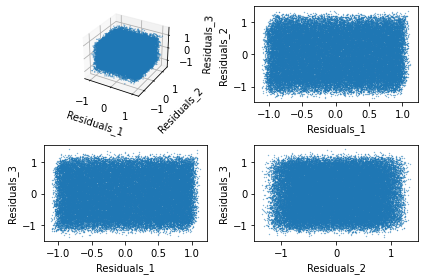

In [151]:
fig = plt.figure()
ax1 = fig.add_subplot(221, projection='3d')

ax1.scatter(residuals2[:,0], residuals2[:,1], residuals2[:,2], s=0.1, alpha=0.8)  # 默认颜色，点大小为50
ax1.set_xlabel('Residuals_1')
ax1.set_ylabel('Residuals_2')
ax1.set_zlabel('Residuals_3')

# x-y 平面散点图
ax2 = fig.add_subplot(222)
ax2.scatter(residuals2[:,0], residuals2[:,1], s=0.1, alpha=0.8)
# ax2.set_title("X-Y Scatter")
ax2.set_xlabel("Residuals_1")
ax2.set_ylabel("Residuals_2")

# x-z 平面散点图
ax3 = fig.add_subplot(223)
ax3.scatter(residuals2[:,0], residuals2[:,2], s=0.1, alpha=0.8)
# ax3.set_title("X-Z Scatter")
ax3.set_xlabel("Residuals_1")
ax3.set_ylabel("Residuals_3")

# y-z 平面散点图
ax4 = fig.add_subplot(224)
ax4.scatter(residuals2[:,1], residuals2[:,2], s=0.1, alpha=0.8)
# ax4.set_title("Y-Z Scatter")
ax4.set_xlabel("Residuals_2")
ax4.set_ylabel("Residuals_3")

# 调整布局
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.feature_selection import mutual_info_regression
import numpy as np
from itertools import combinations

def knn_mutual_information_matrix(data):
    """
    使用 k 近邻法计算矩阵中每两列之间的互信息，并返回平均互信息。

    参数:
        data (numpy.ndarray): 输入矩阵，每列为一个变量。

    返回:
        float: 所有列之间互信息的平均值。
    """
    n_columns = data.shape[1]
    mutual_infos = []

    # 遍历每对列组合
    for i, j in combinations(range(n_columns), 2):
        x = data[:, i].reshape(-1, 1)
        y = data[:, j]

        # 计算互信息
        mi = mutual_info_regression(x, y, discrete_features=False)[0]
        mutual_infos.append(mi)

    # 计算平均互信息
    avg_mi = np.mean(mutual_infos)
    # x = data[:, 0].reshape(-1, 1)
    # y = data[:, 1]
    # avg_mi = mutual_info_regression(x, y, discrete_features=False)[0]
    return avg_mi

In [45]:
n=1000
p =3
tw = 100
A = np.random.uniform(-0.5, 0.5, (p, p))
A0 = np.diag(np.diag(A))
A1 = A-A0

y = np.zeros((n, p))
y[0,:] = np.random.uniform(-1, 1, p)
for t in range(1, n):
    y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

df = pd.DataFrame(y, columns=[f'X{i+1}' for i in range(p)])
df.insert(0, 't', range(1, n+1))

aggregate_df = df.rolling(window=tw, min_periods=1).sum()
X = aggregate_df.iloc[:, 1:].to_numpy()  # 转换为矩阵形式并去掉t

model = LiNGD()
try:
    model.fit(X)
    Bhat = model.adjacency_matrices_
except:
    print()
if sum(model.is_stables_) != 1:
    print()
else:    
    Bhat = Bhat[model.is_stables_==True].squeeze()
    
    data = df.iloc[:,1:].to_numpy()
    prev_rows = np.vstack([np.zeros(data.shape[1]), data[:-1]])
    Y1 = prev_rows - data @ Bhat
    X1 = data - data @ Bhat
    X1 = X1[1:,:]
    Y1 = Y1[1:,:]
    beta1 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
    Y1_fit = X1 @ beta1.T  # 拟合值
    residuals1 = Y1 - Y1_fit  # 残差
    mi1 = knn_mutual_information_matrix(residuals1)

    data = df.iloc[:,1:].to_numpy()
    next_rows = np.vstack([data[1:], np.zeros(data.shape[1])])
    Y2 = next_rows - data @ Bhat
    X2 = data - data @ Bhat
    X2 = X2[:-1,:]
    Y2 = Y2[:-1,:]

    beta2 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
    beta2.shape
    Y2_fit = X2 @ beta2.T  # 拟合值
    residuals2 = Y2 - Y2_fit  # 残差
    mi2 = knn_mutual_information_matrix(residuals2)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [46]:
df

,t,X1,X2,X3
0,1,-0.837003,-0.034300,-0.498041
1,2,-0.102650,1.053611,0.113612
2,3,-0.036331,0.108466,-0.521558
3,4,0.090467,0.492452,0.731586
4,5,0.457612,-0.750219,-0.831098
...,...,...,...,...
995,996,-0.397626,0.226694,0.206488
996,997,-0.107961,-0.745651,-0.706474
997,998,0.388617,-0.339315,0.365790
998,999,0.107754,0.224300,0.398984


In [48]:
prev_rows

array([[ 0.        ,  0.        ,  0.        ],
       [-0.83700296, -0.0343005 , -0.49804137],
       [-0.10264952,  1.05361122,  0.11361231],
       ...,
       [-0.10796104, -0.74565131, -0.70647417],
       [ 0.38861733, -0.339315  ,  0.36578956],
       [ 0.10775391,  0.22429952,  0.39898357]])

In [49]:
mi1

0.018672115432736575

In [50]:
mi2

0.046977013548231174

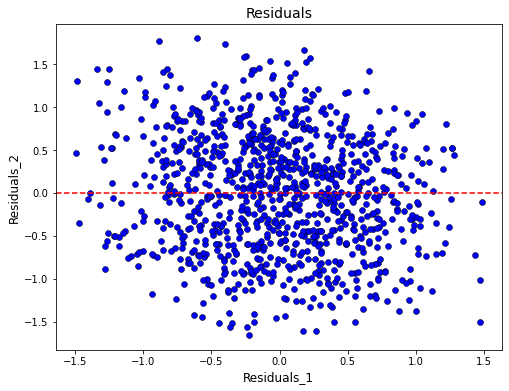

In [61]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residuals1[:,0], y=residuals1[:,2], color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')  # 添加零线
plt.title('Residuals', fontsize=14)
plt.xlabel('Residuals_1', fontsize=12)
plt.ylabel('Residuals_2', fontsize=12)
plt.show()

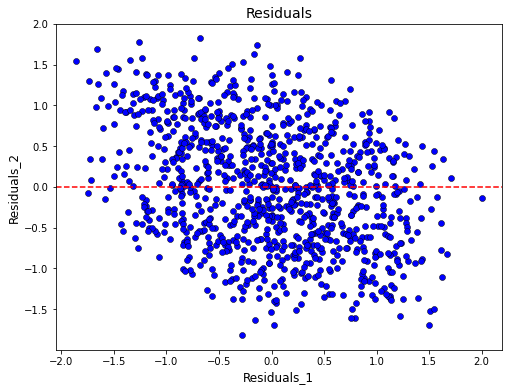

In [62]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=residuals2[:,0], y=residuals2[:,2], color='blue', edgecolor='black')
plt.axhline(0, color='red', linestyle='--')  # 添加零线
plt.title('Residuals', fontsize=14)
plt.xlabel('Residuals_1', fontsize=12)
plt.ylabel('Residuals_2', fontsize=12)
plt.show()

In [59]:
mutual_info_regression(residuals2[:,0].reshape(-1, 1), residuals2[:,2], discrete_features=False)[0]

0.09903914399796943

In [60]:
mutual_info_regression(residuals1[:,0].reshape(-1, 1), residuals1[:,2], discrete_features=False)[0]

0.008912979130994092

In [18]:
def simulate(n,p,tw):
    # repeats
    repeats = 100
    i = 0
    c = 0
    while i<repeats:
        A = np.random.uniform(-0.5, 0.5, (p, p))
        A0 = np.diag(np.diag(A))
        A1 = A-A0

        y = np.zeros((n, p))
        y[0,:] = np.random.uniform(-1, 1, p)
        for t in range(1, n):
            y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

        df = pd.DataFrame(y, columns=[f'X{i+1}' for i in range(p)])
        df.insert(0, 't', range(1, n+1))

        aggregate_df = df.rolling(window=tw, min_periods=1).sum()
        X = aggregate_df.iloc[:, 1:].to_numpy()  # 转换为矩阵形式并去掉t

        model = LiNGD()
        try:
            model.fit(X)
            Bhat = model.adjacency_matrices_
        except:
            continue
        if sum(model.is_stables_) != 1:
            continue
        else:    
            Bhat = Bhat[model.is_stables_==True].squeeze()
            
            data = df.iloc[:,1:].to_numpy()
            prev_rows = np.vstack([np.zeros(data.shape[1]), data[:-1]])
            Y1 = prev_rows - data @ Bhat
            X1 = data - data @ Bhat
            X1 = X1[1:,:]
            Y1 = Y1[1:,:]
            beta1 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            Y1_fit = X1 @ beta1.T  # 拟合值
            residuals1 = Y1 - Y1_fit  # 残差
            mi1 = knn_mutual_information_matrix(residuals1)

            data = df.iloc[:,1:].to_numpy()
            next_rows = np.vstack([data[1:], np.zeros(data.shape[1])])
            Y2 = next_rows - data @ Bhat
            X2 = data - data @ Bhat
            X2 = X2[:-1,:]
            Y2 = Y2[:-1,:]

            beta2 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            beta2.shape
            Y2_fit = X2 @ beta2.T  # 拟合值
            residuals2 = Y2 - Y2_fit  # 残差
            mi2 = knn_mutual_information_matrix(residuals2)
            
            i += 1
            c += (mi2<mi1).astype('int')
    return c/repeats


In [9]:
# 参数设置
# n = 10000  # 样本数量
# p = 3      # 变量数量
# tw = 1000  # 每组行数
sc0 = simulate(n=10000,p=3,tw=500)
sc1 = simulate(n=10000,p=3,tw=1000)
sc2 = simulate(n=10000,p=3,tw=2000)
sc3 = simulate(n=20000,p=3,tw=2000)
sc4 = simulate(n=50000,p=3,tw=2000)
# sc5 = simulate(n=50000,p=3,tw=5000)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing toler

In [ ]:
print([sc0,sc1,sc2,sc3,sc4])

[0.61, 0.67, 0.61, 0.65, 0.63, 0.58]


In [10]:
print([sc0,sc1,sc2,sc3,sc4])

[0.63, 0.57, 0.68, 0.61, 0.63]


In [64]:
sc6 = simulate(n=2000,p=3,tw=100)
sc7 = simulate(n=2000,p=3,tw=200)
sc8 = simulate(n=1000,p=3,tw=100)
sc9 = simulate(n=1000,p=3,tw=200)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

In [30]:
print([sc6,sc7,sc8,sc9])

[0.56, 0.5, 0.61, 0.6]


In [65]:
print([sc6,sc7,sc8,sc9])

[0.53, 0.51, 0.48, 0.42]


In [31]:
sp0 = simulate(n=1000,p=5,tw=100)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten

In [32]:
sp0

0.41

In [21]:
sp0 = simulate(n=10000,p=5,tw=5000)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by

In [22]:
sp0

0.47

In [ ]:
sp0 = simulate(n=10000,p=5,tw=500)
sp1 = simulate(n=10000,p=5,tw=1000)
sp2 = simulate(n=10000,p=5,tw=2000)
sp3 = simulate(n=20000,p=5,tw=2000)
sp4 = simulate(n=50000,p=5,tw=2000)
# sp5 = simulate(n=50000,p=5,tw=5000)
# sp6 = simulate(n=50000,p=5,tw=10000)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten

In [ ]:
print([sp0,sp1,sp2,sp3,sp4])

In [33]:
from sklearn.decomposition import PCA
def simulate_pca(n,p,tw):
    # repeats
    repeats = 100
    i = 0
    c = 0
    while i<repeats:
        A = np.random.uniform(-0.25, 0.25, (p, p))
        A0 = np.diag(np.diag(A))
        A1 = A-A0

        y = np.zeros((n, p))
        y[0,:] = np.random.uniform(-1, 1, p)
        for t in range(1, n):
            y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

        df = pd.DataFrame(y, columns=[f'X{i+1}' for i in range(p)])
        # df.insert(0, 't', range(1, n+1))
        pca = PCA(n_components=1)  # 只提取第一主成分
        df['PC1'] = pca.fit_transform(df)
        df = df.sort_values(by='PC1', ascending=True).reset_index(drop=True)
        df.insert(0, 't', range(1, n+1))
        df = df.drop(columns=['PC1'])

        aggregate_df = df.rolling(window=tw, min_periods=1).sum()
        X = aggregate_df.iloc[:, 1:].to_numpy()  # 转换为矩阵形式并去掉t

        model = LiNGD()
        try:
            model.fit(X)
            Bhat = model.adjacency_matrices_
        except:
            continue
        if sum(model.is_stables_) != 1:
            continue
        else:    
            Bhat = Bhat[model.is_stables_==True].squeeze()
            
            data = df.iloc[:,1:].to_numpy()
            prev_rows = np.vstack([np.zeros(data.shape[1]), data[:-1]])
            Y1 = prev_rows - data @ Bhat
            X1 = data - data @ Bhat
            X1 = X1[1:,:]
            Y1 = Y1[1:,:]
            beta1 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            Y1_fit = X1 @ beta1.T  # 拟合值
            residuals1 = Y1 - Y1_fit  # 残差
            mi1 = knn_mutual_information_matrix(residuals1)

            data = df.iloc[:,1:].to_numpy()
            next_rows = np.vstack([data[1:], np.zeros(data.shape[1])])
            Y2 = next_rows - data @ Bhat
            X2 = data - data @ Bhat
            X2 = X2[:-1,:]
            Y2 = Y2[:-1,:]

            beta2 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            beta2.shape
            Y2_fit = X2 @ beta2.T  # 拟合值
            residuals2 = Y2 - Y2_fit  # 残差
            mi2 = knn_mutual_information_matrix(residuals2)
            
            i += 1
            c += (mi2<mi1).astype('int')
    return c/repeats

In [34]:
sd5 = simulate_pca(n=1000,p=3,tw=1000)
sd5

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

0.5

In [24]:
sd0 = simulate_pca(n=10000,p=3,tw=500)
sd1 = simulate_pca(n=10000,p=3,tw=1000)
sd2 = simulate_pca(n=10000,p=3,tw=2000)
sd3 = simulate_pca(n=20000,p=3,tw=2000)
sd4 = simulate_pca(n=50000,p=3,tw=2000)
# sd5 = simulate_pca(n=50000,p=3,tw=5000)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:120: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by

In [35]:
print([sd0,sd1,sd2,sd3,sd4])

[0.55, 0.5, 0.4, 0.45, 0.54]


In [36]:
sd2 = simulate_pca(n=10000,p=3,tw=2000)
sd3 = simulate_pca(n=20000,p=3,tw=2000)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

In [39]:
print([sd2,sd3])

[0.52, 0.49]


In [26]:
def simulate_miss(n,p,tw,prop):
    # repeats
    repeats = 100
    i = 0
    c = 0
    while i<repeats:
        A = np.random.uniform(-0.25, 0.25, (p, p))
        A0 = np.diag(np.diag(A))
        A1 = A-A0

        y = np.zeros((n, p))
        y[0,:] = np.random.uniform(-1, 1, p)
        for t in range(1, n):
            y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

        df = pd.DataFrame(y, columns=[f'X{i+1}' for i in range(p)])
        df.insert(0, 't', range(1, n+1))
        df = df.drop(df.sample(n=int(len(df)*prop)).index)

        aggregate_df = df.rolling(window=tw, min_periods=1).sum()
        X = aggregate_df.iloc[:, 1:].to_numpy()  # 转换为矩阵形式并去掉t

        model = LiNGD()
        try:
            model.fit(X)
            Bhat = model.adjacency_matrices_
        except:
            continue
        if sum(model.is_stables_) != 1:
            continue
        else:    
            Bhat = Bhat[model.is_stables_==True].squeeze()
            
            data = df.iloc[:,1:].to_numpy()
            prev_rows = np.vstack([np.zeros(data.shape[1]), data[:-1]])
            Y1 = prev_rows - data @ Bhat
            X1 = data - data @ Bhat
            X1 = X1[1:,:]
            Y1 = Y1[1:,:]
            beta1 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            Y1_fit = X1 @ beta1.T  # 拟合值
            residuals1 = Y1 - Y1_fit  # 残差
            mi1 = knn_mutual_information_matrix(residuals1)

            data = df.iloc[:,1:].to_numpy()
            next_rows = np.vstack([data[1:], np.zeros(data.shape[1])])
            Y2 = next_rows - data @ Bhat
            X2 = data - data @ Bhat
            X2 = X2[:-1,:]
            Y2 = Y2[:-1,:]

            beta2 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            beta2.shape
            Y2_fit = X2 @ beta2.T  # 拟合值
            residuals2 = Y2 - Y2_fit  # 残差
            mi2 = knn_mutual_information_matrix(residuals2)
            
            i += 1
            c += (mi2<mi1).astype('int')
    return c/repeats

In [40]:
sk0 = simulate_miss(n=10000,p=3,tw=2000,prop=0)
sk1 = simulate_miss(n=10000,p=3,tw=2000,prop=0.1)
sk2 = simulate_miss(n=10000,p=3,tw=2000,prop=0.2)
sk3 = simulate_miss(n=10000,p=3,tw=2000,prop=0.3)

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

In [42]:
print([sk0,sk1,sk2,sk3])

[0.46, 0.5, 0.53, 0.44]


In [43]:
sk0 = simulate_miss(n=10000,p=3,tw=2000,prop=0)
sk0

C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Users\lenovo\AppData\Roaming\Python\Python38\site-packages\sklearn\decomposition\_fastica.py:494: FutureWarning: Starting in v1.3, whiten='unit-variance' will be used by default.
  warnings.warn(
C:\Us

0.44

In [4]:
def simulate_withture(n,p,tw):
    # repeats
    repeats = 100
    i = 0
    c = 0
    while i<repeats:
        A = np.random.uniform(-0.25, 0.25, (p, p))
        A0 = np.diag(np.diag(A))
        A1 = A-A0

        y = np.zeros((n, p))
        y[0,:] = np.random.uniform(-1, 1, p)
        for t in range(1, n):
            y[t, :] = A @ y[t - 1, :] + np.random.uniform(-1, 1, p)

        df = pd.DataFrame(y, columns=[f'X{i+1}' for i in range(p)])
        df.insert(0, 't', range(1, n+1))
        try:
            I = np.eye(p)
            Bhat = np.linalg.inv(I-A0)@A1 
            data = df.iloc[:,1:].to_numpy()
            prev_rows = np.vstack([np.zeros(data.shape[1]), data[:-1]])
            Y1 = prev_rows - data @ Bhat
            X1 = data - data @ Bhat
            X1 = X1[1:,:]
            Y1 = Y1[1:,:]
            beta1 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            Y1_fit = X1 @ beta1.T  # 拟合值
            residuals1 = Y1 - Y1_fit  # 残差
            mi1 = knn_mutual_information_matrix(residuals1)

            data = df.iloc[:,1:].to_numpy()
            next_rows = np.vstack([data[1:], np.zeros(data.shape[1])])
            Y2 = next_rows - data @ Bhat
            X2 = data - data @ Bhat
            X2 = X2[:-1,:]
            Y2 = Y2[:-1,:]

            beta2 = np.linalg.lstsq(X1, Y1, rcond=None)[0].T
            beta2.shape
            Y2_fit = X2 @ beta2.T  # 拟合值
            residuals2 = Y2 - Y2_fit  # 残差
            mi2 = knn_mutual_information_matrix(residuals2)
            
            i += 1
            c += (mi2<mi1).astype('int')
        except:
            continue   
    return c/repeats

In [5]:
f1 = simulate_withture(10000,3,100)
f2 = simulate_withture(10000,5,100)
# f3 = simulate_withture(10000,10,100)

In [7]:
print([f1,f2])

[0.47, 0.33]
